In [1]:
%cd ..
import sys
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Adjust the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Test the imports
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from data_preprocessing import load_data, clean_data
    from feature_extraction import extract_features
    from maneuver_detection import detect_maneuvers
    print("Imports successful!")
except ImportError as e:
    print(f"Import error: {e}")


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


d:\orbital_maneuver_detection
Current working directory: d:\orbital_maneuver_detection
Imports successful!


In [2]:
# Load and explore data
data_path = 'data/SMA_data.csv'
data = load_data(data_path)

In [3]:
print(data.head())

                                    SMA
Datetime                               
2018-01-01 04:34:10.320672  6864.691463
2018-01-01 12:37:36.596064  6864.689664
2018-01-01 20:31:55.898112  6864.688585
2018-01-02 05:42:49.014720  6864.684927
2018-01-02 12:13:01.263360  6864.682858


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2291 entries, 2018-01-01 04:34:10.320672 to 2019-12-31 18:43:37.271136
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA     2291 non-null   float64
dtypes: float64(1)
memory usage: 35.8 KB
None


In [5]:
print(data.describe())

               SMA
count  2291.000000
mean   6867.611447
std       4.251829
min    6863.806871
25%    6864.211480
50%    6864.558916
75%    6872.988868
max    6873.482523


In [6]:
cleaned_data = clean_data(data)

In [7]:
print("Cleaned Data Overview:")
print(cleaned_data.head())

Cleaned Data Overview:
                                    SMA
Datetime                               
2018-01-01 04:34:10.320672  6864.691463
2018-01-01 12:37:36.596064  6864.689664
2018-01-01 20:31:55.898112  6864.688585
2018-01-02 05:42:49.014720  6864.684927
2018-01-02 12:13:01.263360  6864.682858


In [8]:
features = extract_features(cleaned_data)

In [9]:
print("Extracted Features Overview:")
print(features.head())

Extracted Features Overview:
                            SMA Change  Maneuver
Datetime                                        
2018-01-01 04:34:10.320672         NaN     False
2018-01-01 12:37:36.596064   -0.001799     False
2018-01-01 20:31:55.898112   -0.001079     False
2018-01-02 05:42:49.014720   -0.003658     False
2018-01-02 12:13:01.263360   -0.002069     False


In [10]:
# Detect maneuvers
detected_maneuvers = detect_maneuvers(cleaned_data, window=1, threshold=5)

In [11]:
print("Detected Maneuvers Overview:")
print(detected_maneuvers.head())

Detected Maneuvers Overview:
                                    SMA  Detected_Maneuver
Datetime                                                  
2018-01-01 04:34:10.320672  6864.691463                  0
2018-01-01 12:37:36.596064  6864.689664                  0
2018-01-01 20:31:55.898112  6864.688585                  0
2018-01-02 05:42:49.014720  6864.684927                  0
2018-01-02 12:13:01.263360  6864.682858                  0


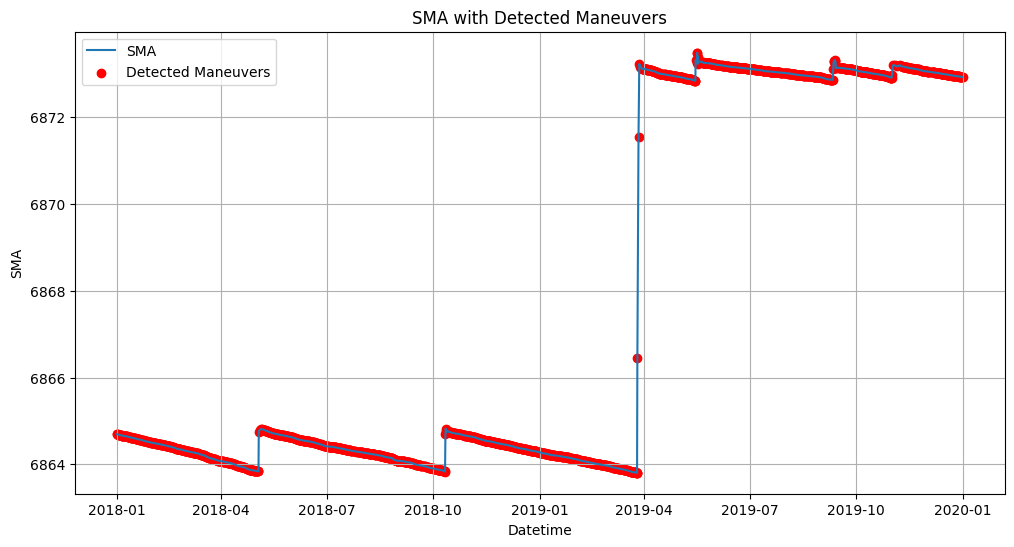

In [12]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data.index, cleaned_data['SMA'], label='SMA')
plt.scatter(detected_maneuvers.index, detected_maneuvers['SMA'], color='red', label='Detected Maneuvers')
plt.xlabel('Datetime')
plt.ylabel('SMA')
plt.title('SMA with Detected Maneuvers')
plt.legend()
plt.grid(True)
plt.show()